In [1]:
import scipy
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#create a lti 
G = scipy.signal.lti([4],[10,1])
k=4
tau=10

In [3]:
u= np.ones(400)
#make random step signals
u[0:20] = 0
u[100:110]=0
u[200:250]=0
ts = range(400)

In [4]:
y = 0
ys = []
for t in ts:
    
    dydt = (-1/tau)*y + (k/tau)*u[t]
    
    y += dydt
    ys.append(y)

In [5]:
len(ys)

400

In [6]:
delay = 20
y_del = np.concatenate((np.zeros(20),ys[:(len(ys)-delay)]))

In [7]:
noise = np.random.rand(400)

In [8]:
y_noise = y_del + noise

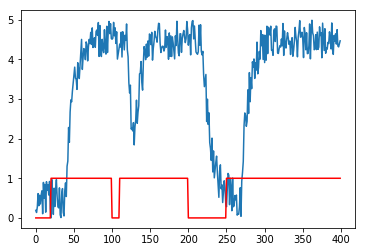

In [9]:
plt.plot(y_noise)
plt.plot(u,'r')

it is not able to estimate the delay by itself , due to the discontinuity due to the delay . so it is better to try the discrete methods, where the linear regression can be performed.

In [10]:
def func_cf(u,k,tau,d):
    y = 0
    ys = []
    ts = range(400)
    for t in ts:
    
        dydt = (-1/tau)*y + (k/tau)*u[t]
    
        y += dydt
        ys.append(y)
    
    #y_del = np.concatenate((np.zeros(20),ys[:(len(ys)-delay)]))
    y_del = np.concatenate((np.zeros(int(d)),ys[:(len(ys)-int(20))]))
    return y_del

In [11]:
popt, pcov =  scipy.optimize.curve_fit(func_cf,u,y_noise)

ValueError: operands could not be broadcast together with shapes (381,) (400,) 

In [12]:
popt,pcov

(array([  4.5483011 ,  10.76747035,   1.        ]), array([[ inf,  inf,  inf],
        [ inf,  inf,  inf],
        [ inf,  inf,  inf]]))

now let us try the least square methods

In [24]:
def fit(P):
    y= 0
    ys = []
    ts = range(400)
    for t in ts:
        dydt = (-1/P[0])*y+ (P[0]/P[1])*u[t]
        y += dydt
        ys.append(y)
    Y_del = np.concatenate(np.zeros(20),ys[:(len(ys)-20)])
    return (y_del-y_noise)

In [25]:
scipy.optimize.least_squares(fit, x0=[1,1])

TypeError: an integer is required for the axis